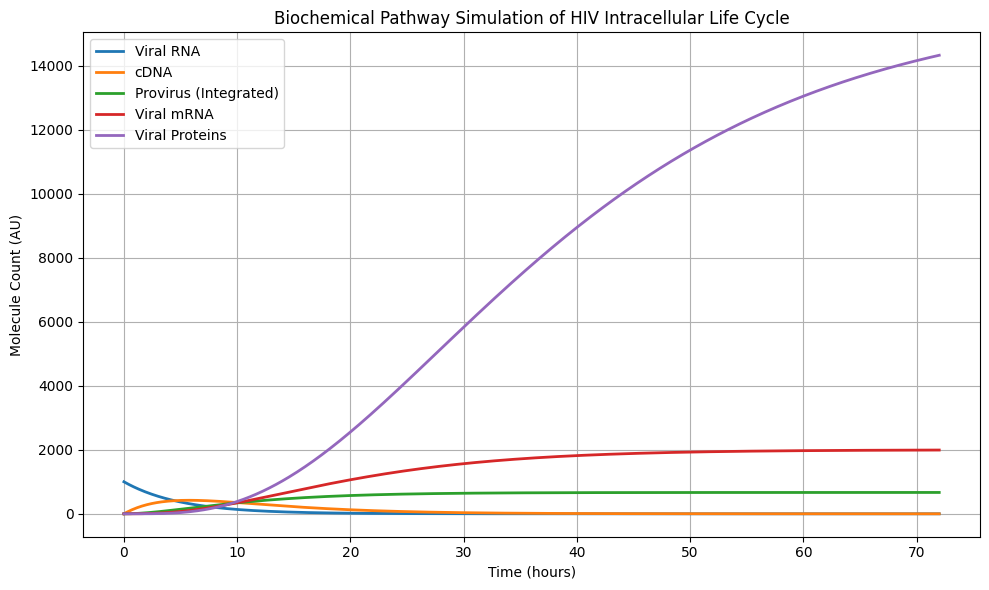

In [1]:
"""
Biochemical Pathway Simulation in HIV Virus

Models simplified HIV intracellular replication using biochemical ODEs
"""

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ----------------------------
# ODE System: HIV Life Cycle
# ----------------------------
def hiv_model(y, t, params):
    # Molecular species
    RNA, cDNA, Provirus, Viral_mRNA, Proteins = y

    # Parameters (kinetics)
    k1 = params['k1']  # Reverse transcription rate
    k2 = params['k2']  # cDNA degradation rate
    k3 = params['k3']  # Integration rate
    k4 = params['k4']  # Transcription rate
    k5 = params['k5']  # Translation rate
    k_deg_mRNA = params['k_deg_mRNA']
    k_deg_prot = params['k_deg_prot']

    # ODEs
    dRNA_dt = -k1 * RNA
    dcDNA_dt = k1 * RNA - k2 * cDNA - k3 * cDNA
    dProvirus_dt = k3 * cDNA
    dViral_mRNA_dt = k4 * Provirus - k_deg_mRNA * Viral_mRNA
    dProteins_dt = k5 * Viral_mRNA - k_deg_prot * Proteins

    return [dRNA_dt, dcDNA_dt, dProvirus_dt, dViral_mRNA_dt, dProteins_dt]

# ----------------------------
# Initial Conditions & Params
# ----------------------------
y0 = [1000, 0, 0, 0, 0]  # Initial: RNA only

params = {
    'k1': 0.2,       # reverse transcription rate
    'k2': 0.05,      # cDNA degradation
    'k3': 0.1,       # integration
    'k4': 0.3,       # transcription
    'k5': 0.4,       # translation
    'k_deg_mRNA': 0.1,
    'k_deg_prot': 0.05
}

# Time vector (hours)
t = np.linspace(0, 72, 500)

# ----------------------------
# Solve ODE System
# ----------------------------
sol = odeint(hiv_model, y0, t, args=(params,))
RNA, cDNA, Provirus, Viral_mRNA, Proteins = sol.T

# ----------------------------
# Plot Results
# ----------------------------
plt.figure(figsize=(10, 6))
plt.plot(t, RNA, label="Viral RNA", linewidth=2)
plt.plot(t, cDNA, label="cDNA", linewidth=2)
plt.plot(t, Provirus, label="Provirus (Integrated)", linewidth=2)
plt.plot(t, Viral_mRNA, label="Viral mRNA", linewidth=2)
plt.plot(t, Proteins, label="Viral Proteins", linewidth=2)
plt.xlabel("Time (hours)")
plt.ylabel("Molecule Count (AU)")
plt.title("Biochemical Pathway Simulation of HIV Intracellular Life Cycle")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("hiv_pathway_simulation.png")
plt.show()
